<a href="https://colab.research.google.com/github/MarceloGarcia92/1.PersonalProject_HandModel/blob/main/Body_Joins_Regression_Prediction_mediapipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Usage example of MediaPipe Holistic Solution API in Python (see also http://solutions.mediapipe.dev/holistic).

In [ ]:
!pip install mediapipe

Upload any image that that has a person with visible upper body to the Colab. We take two example images from the web: https://unsplash.com/photos/4jqfc2vbHJQ and https://unsplash.com/photos/72zsd_fnxYc


In [21]:
from google.colab import files

uploaded = files.upload()

Saving Capture4.PNG to Capture4.PNG


Capture4.PNG


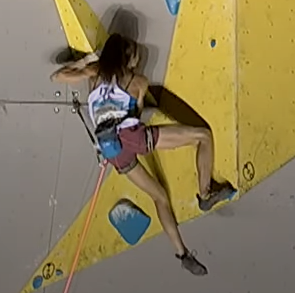

In [22]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Read images with OpenCV.
images = {name: cv2.imread(name) for name in uploaded.keys()}

# Preview the images.
for name, image in images.items():
  print(name)   
  cv2_imshow(image)

All MediaPipe Solutions Python API examples are under mp.solutions.

For the MediaPipe Pose solution, we can access this module as `mp_holistic = mp.solutions.holistic`.

You may change the parameters, such as `static_image_mode` and `min_detection_confidence`, during the initialization. Run `help(mp_holistic.Holistic)` to get more informations about the parameters.

In [23]:
import mediapipe as mp
mp_holistic = mp.solutions.holistic

help(mp_holistic.Holistic)

Help on class Holistic in module mediapipe.python.solutions.holistic:

class Holistic(mediapipe.python.solution_base.SolutionBase)
 |  Holistic(static_image_mode=False, upper_body_only=False, smooth_landmarks=True, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |  
 |  MediaPipe Holistic.
 |  
 |  MediaPipe Holistic processes an RGB image and returns pose landmarks, left and
 |  right hand landmarks, and face mesh landmarks on the most prominent person
 |  detected.
 |  
 |  Please refer to https://solutions.mediapipe.dev/holistic#python-solution-api
 |  for usage examples.
 |  
 |  Method resolution order:
 |      Holistic
 |      mediapipe.python.solution_base.SolutionBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, static_image_mode=False, upper_body_only=False, smooth_landmarks=True, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |      Initializes a MediaPipe Holistic object.
 |      
 |      Args:
 |        static_image

In [24]:
# Prepare DrawingSpec for drawing the face landmarks later.
mp_drawing = mp.solutions.drawing_utils 
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

Nose coordinates: (122.0641340315342, 62.90291252732277)
Pose landmarks of Capture4.PNG:


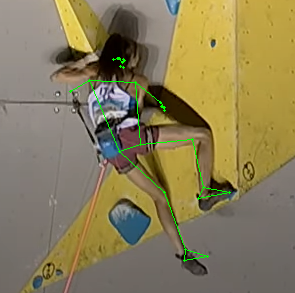

In [25]:
# Initialize MediaPipe Holistic.
with mp_holistic.Holistic(
    static_image_mode=True, min_detection_confidence=0.5) as holistic:
  for name, image in images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Pose.
    results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print nose coordinates.
    image_hight, image_width, _ = image.shape
    if results.pose_landmarks:
      print(
        f'Nose coordinates: ('
        f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].x * image_width}, '
        f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].y * image_hight})'
      )
    # Draw pose landmarks.
    print(f'Pose landmarks of {name}:')
    annotated_image = image.copy()
    mp_drawing.draw_landmarks(annotated_image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(annotated_image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(
        image=annotated_image, 
        landmark_list=results.face_landmarks, 
        connections=mp_holistic.FACE_CONNECTIONS,
        landmark_drawing_spec=drawing_spec,
        connection_drawing_spec=drawing_spec)
    mp_drawing.draw_landmarks(
        image=annotated_image, 
        landmark_list=results.pose_landmarks, 
        connections=mp_holistic.POSE_CONNECTIONS,
        landmark_drawing_spec=drawing_spec,
        connection_drawing_spec=drawing_spec)
    cv2_imshow(annotated_image)

In [20]:
print(results.left_hand_landmarks)

landmark {
  x: 0.5367757678031921
  y: 0.43865495920181274
  z: -1.0608730008243583e-05
}
landmark {
  x: 0.5210005044937134
  y: 0.43731173872947693
  z: 0.0024466009344905615
}
landmark {
  x: 0.511896550655365
  y: 0.42824500799179077
  z: 0.0009348290623165667
}
landmark {
  x: 0.5077024102210999
  y: 0.4160105586051941
  z: 0.0012450309004634619
}
landmark {
  x: 0.5055420398712158
  y: 0.40606987476348877
  z: 0.0018743431428447366
}
landmark {
  x: 0.5125453472137451
  y: 0.4124933183193207
  z: -0.01153709925711155
}
landmark {
  x: 0.5061237812042236
  y: 0.39716267585754395
  z: -0.006280610337853432
}
landmark {
  x: 0.5049694180488586
  y: 0.3989914357662201
  z: 0.0006975744618102908
}
landmark {
  x: 0.5059953927993774
  y: 0.403909832239151
  z: 0.0049478476867079735
}
landmark {
  x: 0.5206634998321533
  y: 0.40640127658843994
  z: -0.011657502502202988
}
landmark {
  x: 0.5142049789428711
  y: 0.3921060264110565
  z: -0.004085719119757414
}
landmark {
  x: 0.513245642